# Imports

In [1]:
import sys
import os
from google.colab import drive
from google.colab import files
from dotenv import load_dotenv
import json
import warnings
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


!pip install papermill
!pip install nbconvert
!pip install nbformat
!pip install IPython

import papermill as pm
import nbformat
from nbconvert import HTMLExporter
from IPython.display import HTML, display

warnings.filterwarnings("ignore")
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.6 MB/s eta 0:00:00


# Bootstrap

In [2]:
np.random.seed(31071967)

load_dotenv()

drive.mount('/content/drive')

with open(f"{os.getenv('PROJECT_PATH')}/src/config.json", 'r') as f:
    project_config = json.load(f)
    project_config.pop('_comment', None)
    project_config.pop('_note', None)
    f.close()

Mounted at /content/drive


In [3]:
# sanity check
project_config["TKL"]

'NVDA'

In [4]:
def run_notebook(notebook_name, output_name, parameters=None):

  # --- Execute the proviuse notebook with parameters ---
  pm.execute_notebook(
      input_path = notebook_name,
      output_path = output_name,
      log_output=False,  # don't print logs while running
      progress_bar=True
  )

  # --- Convert the executed notebook to HTML ---
  nb = nbformat.read(output_name, as_version=4)
  html_exporter = HTMLExporter()
  html_exporter.template_name = "lab"  # modern look; alternatives: 'classic', 'basic'
  body, _ = html_exporter.from_notebook_node(nb)

  # --- Display the HTML result inline ---
  display(HTML(body))

In [5]:
def dataprep_for_inference():

  input_file = f"{os.getenv('PROJECT_PATH')}{project_config['notebooks_directory']}{project_config['notebook3']}"
  output_file = f"{os.getenv('PROJECT_PATH')}{project_config['output_directory']}{project_config['TKL']}.{project_config['output3']}"

  run_notebook(input_file, output_file)

In [6]:
def predict_future_price():

  input_file = f"{os.getenv('PROJECT_PATH')}{project_config['notebooks_directory']}{project_config['notebook4']}"
  output_file = f"{os.getenv('PROJECT_PATH')}{project_config['output_directory']}{project_config['TKL']}.{project_config['output4']}"

  run_notebook(input_file, output_file)

In [7]:
def recommand_investment_strategy():

  input_file = f"{os.getenv('PROJECT_PATH')}{project_config['notebooks_directory']}{project_config['notebook7']}"
  output_file = f"{os.getenv('PROJECT_PATH')}{project_config['output_directory']}{project_config['TKL']}.{project_config['output7']}"

  run_notebook(input_file, output_file)

Executing:   0%|          | 0/10 [00:00<?, ?cell/s]

Executing:   0%|          | 0/9 [00:00<?, ?cell/s]


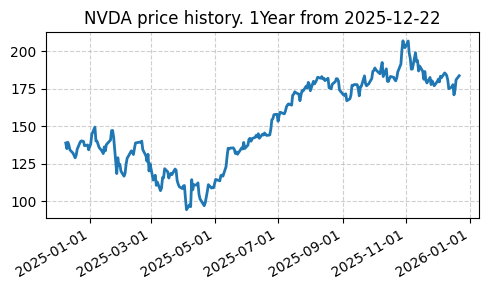

Executing:   0%|          | 0/10 [00:00<?, ?cell/s]

In [8]:
dataprep_for_inference()
recommand_investment_strategy()
predict_future_price()